## BestiaPop: argument explanation

#### _<font color='chartreuse'>action</font>_
* **OPTION 1:** `download-nc4-file`: it will only download a particular NetCDF4 file from the cloud to your local disk, the source can be specified with the `data_source` parameter.
* **OPTION 2:** `convert-nc4`: it will only convert a local or cloud file from NC4 format to the output format specified with `output_type`.
* **OPTION 3:** `generate-climate-file`: the default action, it will generate a particular climate file (MET for APSIM, WTH for DSSAT or csv) using the parameters passed in as years, climate variable, etc.

#### _<font color='chartreuse'>coordinate_list</font>_
It will look for the closest grid cell of 0.5° for nasapower and 0.05° for silo data.
* **OPTION 1:** [ [ lat , lon ]...]
* **OPTION 2:** lists of lat/lon pairs where the first value is `latitude` and the second value is `longitude` (you need to host your lat/lon list as a file in some web server and then provide the url)

#### _<font color='chartreuse'>data_source</font>_
`silo` (Australia only) or `nasapower` (world wide).

#### _<font color='chartreuse'>input_path</font>_
If the NetCDF files to be processed are stored locally, this path will be used to look for all the files required to extract data from the different year, latitude and longitude ranges.

#### _<font color='chartreuse'>climate_variables</font>_
`'radiation'`, `'max_temp'`, `'min_temp'`, `'daily_rain’`

#### _<font color='chartreuse'>year_range</font>_
A starting and ending year separated by a dash, example: `"2012-2016“`. For mandatory variables for crop models (solar radiation, rainfall, minimum and maximum temperature), years can be from 1889 to the last complete year and from 1984 to the last complete year for silo and nasapower, respectively.

#### _<font color='chartreuse'>output_type</font>_
`met`, `wth` or `csv`

#### _<font color='chartreuse'>output_path</font>_
The path where generated output files will be stored. For Binder it is the current directory `os.getcwd()`. When data is managed as dataframe it is `None`. For local use (your computer) please provide your local address `r'C:\...\...\'`

#### _<font color='chartreuse'>multiprocessing</font>_
Function not currently available to be developed.

## Install BestiaPop

In [ ]:
!pip install bestiapop

## Import required packages

In [2]:
import numpy as np
import os
import pandas as pd
from csv import reader
from bestiapop import bestiapop

## <font color='chartreuse'>Example 1:</font> Download from the SILO API in MET format (APSIM) for one lat/lon combination (1 year)

In [32]:
# Step 1: Define variables to pass in to Bestiapop
coordinate_list = [[-27.495210, 152.806398]] 
action='generate-climate-file'
data_source='silo'
year_range='2020-2020'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
output_type='met'
output_path=r'C:\Users\uqjojeda\Dropbox\testbestiapop\test'

# Step 2: Run BestiaPop and download data
final_df = pd.DataFrame()

for coord in coordinate_list:
    print('Fetching data for {}/{}'.format(coord[0], coord[1]))
    climate_data = bestiapop.CLIMATEBEAST(
        action='generate_met',
        data_source=data_source,
        output_path=output_path,
        output_type=output_type,
        input_path=None,
        climate_variables=climate_variables,
        year_range=year_range,
        lat_range=[coord[0]],
        lon_range=[coord[1]],
        multiprocessing=None
          )
    data = climate_data.process_records(action)
    final_df = final_df.append(data, ignore_index=True)

2021-06-09 23:38:29 - POPBEAST - Extracting data and converting to met format


Fetching data for -27.49521/152.806398
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  1.15it/s]


## <font color='chartreuse'>Example 2:</font> Download from the SILO API in WTH format (DSSAT) for a list of lat/lon combinations (1 year)

In [42]:
# Step 1: Define variables to pass in to Bestiapop
url = "https://raw.githubusercontent.com/JJguri/bestiapop/master/sample-data/lists/short_example.csv"
df = pd.read_csv(url)
coordinate_list = df.values.tolist()
action='generate-climate-file' 
data_source='silo'
year_range='2020-2020'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
output_type='wth'
output_path=r'C:\Users\uqjojeda\Dropbox\testbestiapop\test'

# Step 2: Run BestiaPop and download data
final_df = pd.DataFrame()

for coord in coordinate_list:
    print('Fetching data for {}/{}'.format(coord[0], coord[1]))
    climate_data = bestiapop.CLIMATEBEAST(
        action='generate_met',
        data_source=data_source,
        output_path=output_path,
        output_type=output_type,
        input_path=None,
        climate_variables=climate_variables,
        year_range=year_range,
        lat_range=[coord[0]],
        lon_range=[coord[1]],
        multiprocessing=None
          )
    data = climate_data.process_records(action)
    final_df = final_df.append(data, ignore_index=True)

2021-06-09 23:48:55 - POPBEAST - Extracting data and converting to wth format


Fetching data for -39.6/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.72it/s]

2021-06-09 23:48:55 - POPBEAST - Extracting data and converting to wth format



Fetching data for -39.65/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.21it/s]

2021-06-09 23:48:55 - POPBEAST - Extracting data and converting to wth format



Fetching data for -39.65/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.40it/s]

2021-06-09 23:48:55 - POPBEAST - Extracting data and converting to wth format



Fetching data for -39.7/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.17it/s]

2021-06-09 23:48:56 - POPBEAST - Extracting data and converting to wth format



Fetching data for -39.7/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  4.91it/s]


## <font color='chartreuse'>Example 3:</font> Download from the SILO API for a list of lat/lon combinations (2 years), create dataframe, summary statistics and visualisation 

In [34]:
# Step 1: Define variables to pass in to Bestiapop
url = "https://raw.githubusercontent.com/JJguri/bestiapop/master/sample-data/lists/bpop_island_example.csv"
df = pd.read_csv(url)
coordinate_list = df.values.tolist()
action='generate-climate-file' 
data_source='silo'
year_range='2019-2020'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
output_type='dataframe'
output_path=None

# Step 2: Run BestiaPop and download data

final_df = pd.DataFrame()

for coord in coordinate_list:
    print('Fetching data for {}/{}'.format(coord[0], coord[1]))
    climate_data = bestiapop.CLIMATEBEAST(
        action='generate_met',
        data_source=data_source,
        output_path=output_path,
        output_type=output_type,
        input_path=None,
        climate_variables=climate_variables,
        year_range=year_range,
        lat_range=[coord[0]],
        lon_range=[coord[1]],
        multiprocessing=None
          )
    data = climate_data.process_records(action)
    final_df = final_df.append(data, ignore_index=True)

# Show the final dataframe
final_df

2021-06-09 23:39:53 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.1/143.9
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.26it/s]

2021-06-09 23:39:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.1/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.56it/s]

2021-06-09 23:39:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/143.85
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.80it/s]

2021-06-09 23:39:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.39it/s]

2021-06-09 23:39:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.62it/s]

2021-06-09 23:39:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.98it/s]

2021-06-09 23:39:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/144.1
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.57it/s]

2021-06-09 23:39:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.0/143.9
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.49it/s]

2021-06-09 23:39:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.0/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.59it/s]

2021-06-09 23:39:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.0/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.69it/s]

2021-06-09 23:39:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.0/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.80it/s]

2021-06-09 23:39:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.0/144.1
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.73it/s]

2021-06-09 23:39:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/143.9
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.45it/s]

2021-06-09 23:39:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.59it/s]

2021-06-09 23:39:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.74it/s]

2021-06-09 23:39:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.52it/s]

2021-06-09 23:39:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/144.1
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.61it/s]

2021-06-09 23:39:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/144.15
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.26it/s]

2021-06-09 23:39:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/143.9
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.66it/s]

2021-06-09 23:39:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.33it/s]

2021-06-09 23:39:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.50it/s]

2021-06-09 23:39:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.51it/s]

2021-06-09 23:40:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/144.1
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.35it/s]

2021-06-09 23:40:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/143.9
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.57it/s]

2021-06-09 23:40:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.61it/s]

2021-06-09 23:40:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.77it/s]

2021-06-09 23:40:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.70it/s]

2021-06-09 23:40:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/144.1
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.37it/s]

2021-06-09 23:40:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/143.9
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.64it/s]

2021-06-09 23:40:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.67it/s]

2021-06-09 23:40:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  2.83it/s]

2021-06-09 23:40:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.53it/s]

2021-06-09 23:40:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/144.1
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.23it/s]

2021-06-09 23:40:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/143.9
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.64it/s]

2021-06-09 23:40:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.63it/s]

2021-06-09 23:40:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.55it/s]

2021-06-09 23:40:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.51it/s]

2021-06-09 23:40:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/144.1
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.55it/s]

2021-06-09 23:40:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/143.9
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.65it/s]

2021-06-09 23:40:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/143.95
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.48it/s]

2021-06-09 23:40:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.59it/s]

2021-06-09 23:40:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.54it/s]

2021-06-09 23:40:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/144.1
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.65it/s]

2021-06-09 23:40:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.65/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.61it/s]

2021-06-09 23:40:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.65/144.05
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.33it/s]

2021-06-09 23:40:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.6/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.57it/s]

2021-06-09 23:40:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.6/144.0
Fetching and Parsing Data: 100%|#########################################################| 1/1 [00:00<00:00,  3.34it/s]


,lon,lat,year,day,radn,maxt,mint,rain
0,143.9,-40.1,2019,1,18.8,20.2,12.7,0.0
1,143.9,-40.1,2019,2,14.2,19.8,14.1,0.0
2,143.9,-40.1,2019,3,28.5,24.0,8.5,0.0
3,143.9,-40.1,2019,4,14.3,26.0,16.8,0.0
4,143.9,-40.1,2019,5,21.6,19.7,14.2,0.0
...,...,...,...,...,...,...,...,...
34352,144.0,-39.6,2020,362,9.1,22.9,14.3,0.2
34353,144.0,-39.6,2020,363,27.1,16.3,9.9,3.0
34354,144.0,-39.6,2020,364,13.9,18.7,10.9,0.0
34355,144.0,-39.6,2020,365,16.6,18.8,13.0,0.2


## Calculating yearly statistics

Let's calculate some statistics base on the climate data we retrieved from SILO

> NOTE: here we presente the sum of rain and radiation and the mean of daily minimum and maximum temperature across years. You can change the parameters you want to get lookin at the [GroupBy](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html) documentation.

In [35]:
#calculate yearly mean of mint and maxt (degree C) and cummulative radn (MJ m-2) and rain (mm) across years and lat/lon combinations
mini = final_df.groupby(['lon','lat','year'], as_index=True)['maxt'].mean().round(decimals=1)
maxi = final_df.groupby(['lon','lat','year'], as_index=True)['mint'].mean().round(decimals=1)
radn = final_df.groupby(['lon','lat','year'], as_index=True)['radn'].sum().round(decimals=1)
rain = final_df.groupby(['lon','lat','year'], as_index=True)['rain'].sum().round(decimals=1)
st0 = pd.merge(radn, mini, on=(['lon','lat','year']), how='outer')
st00 = pd.merge(maxi, rain, on=(['lon','lat','year']), how='outer')
st_final = pd.merge(st0, st00, on=(['lon','lat','year']), how='outer')

#Save the statistical summary in the current dir
st_final.to_csv(r'C:\Users\uqjojeda\Dropbox\testbestiapop\test\test.csv')
st_final

radn  maxt  mint    rain
lon    lat    year                            
143.85 -40.05 2019  4375.6  16.9  10.2   873.1
              2020  4019.0  16.6  10.0   963.3
143.90 -40.10 2019  4382.5  16.6  10.1   889.8
              2020  4014.5  16.4   9.9  1003.3
       -40.00 2019  4395.3  16.8  10.1   925.1
...                    ...   ...   ...     ...
144.10 -39.75 2020  4098.4  17.1  10.3   984.1
       -39.70 2019  4471.3  17.5  10.5   800.7
              2020  4113.1  17.1  10.3   980.6
144.15 -39.95 2019  4430.3  16.9  10.2  1056.3
              2020  4062.9  16.6  10.1  1068.7

[92 rows x 4 columns]

## This code re-structure the datasets before mapping

In [36]:
#Preparinf dataset to plot
radnrain = final_df.groupby(['lat', 'lon','year'],as_index=True).sum()
temp = final_df.groupby(['lat', 'lon','year'],as_index=True).mean()
#Reseting index
Pre_nc = radnrain.reset_index()
#Set indexes
Pre_nc.set_index(['lat', 'lon', 'year'], inplace=True)
df1 = Pre_nc[~Pre_nc.index.duplicated(keep='first')]
#From 2D dataframe to xarray
nc_r = df1.to_xarray()
#Reseting index
Pre_nc2 = temp.reset_index()
#Set indexes
Pre_nc2.set_index(['lat', 'lon', 'year'], inplace=True)
df2 = Pre_nc2[~Pre_nc2.index.duplicated(keep='first')]
#From 2D dataframe to xarray
nc_t = df2.to_xarray()

# Tips before mapping climate variables

* check the variable name you want to map in `p=nc_r.rain.mean`.
* adapt the latitude and longitude corners of your study region in `ax.set_extent`.
* edit your colorbar label in `cb.set_label`
* For further details on cartopy functions visit [Cartopy](https://scitools.org.uk/cartopy/docs/latest/).

## Mapping rainfall

> NOTE: Each 5 km grid represents the mean (across years) of cumulative rainfall during the year

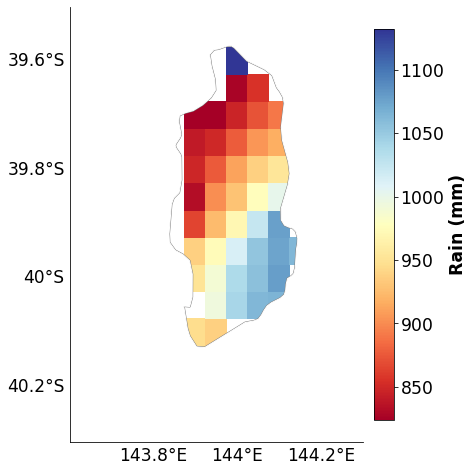

In [41]:
#Packages required for the mapping functions
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with cumulative rain during the year <--update central longitude in 'projection=ccrs.Mercator(' accordingly with the region of interest
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))
p=nc_r.rain.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu, zorder=1, add_colorbar=False)

#Arranguing features, borders and axis labels 
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)

#you will need to update the 3 following lines accordingly with the region of interest
ax.set_extent([143.6, 144.3, -40.3, -39.5], crs=ccrs.PlateCarree())
gl.xlocator = mticker.FixedLocator([143.8, 144, 144.2])
gl.ylocator = mticker.FixedLocator([-39.6, -39.8, -40, -40.2])
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}
ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Setting colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Rain (mm)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

#Save the map to the current directory
plt.savefig(r'C:\Users\uqjojeda\Dropbox\testbestiapop\test\rainfall.png', dpi=600, bbox_inches='tight', pad_inches=0)

## Mapping solar radiation

> NOTE: Each 5 km grid represents the mean (across years) of cumulative solar dariation during the year

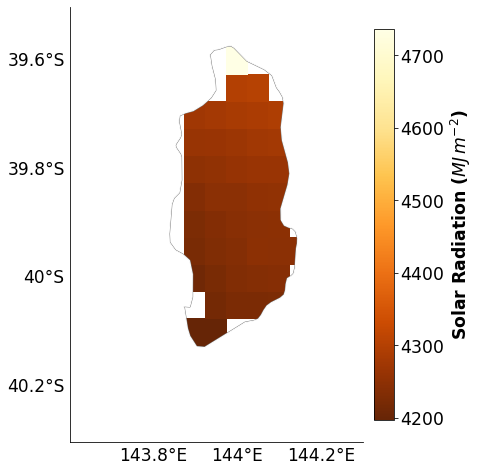

In [30]:
#Packages required for the mapping functions
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with cumulative rain during the year <--update central longitude in 'projection=ccrs.Mercator(' accordingly with the region of interest
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))
p=nc_r.radn.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.YlOrBr_r, zorder=1, add_colorbar=False)

#Arranguing features, borders and axis labels 
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)

#you will need to update the 3 following lines accordingly with the region of interest
ax.set_extent([143.6, 144.3, -40.3, -39.5], crs=ccrs.PlateCarree())
gl.xlocator = mticker.FixedLocator([143.8, 144, 144.2])
gl.ylocator = mticker.FixedLocator([-39.6, -39.8, -40, -40.2])
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}
ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Setting colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Solar Radiation ($MJ\,m^{-2}$)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

#Save the map to the current directory
#plt.savefig(os.getcwd(), dpi=600, bbox_inches='tight', pad_inches=0)

## Mapping minimum temperature

> NOTE: Each 5 km grid represents the mean (across years) of the mean minimum temperature during the year

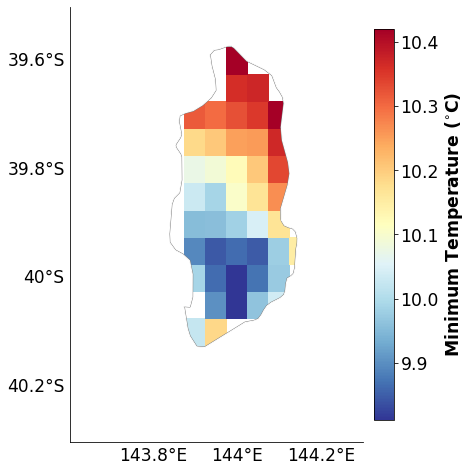

In [20]:
#Packages required for the mapping functions
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with cumulative rain during the year <--update central longitude in 'projection=ccrs.Mercator(' accordingly with the region of interest
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))
p=nc_t.mint.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu_r, zorder=1, add_colorbar=False)

#Arranguing features, borders and axis labels 
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)

#you will need to update the 3 following lines accordingly with the region of interest
ax.set_extent([143.6, 144.3, -40.3, -39.5], crs=ccrs.PlateCarree())
gl.xlocator = mticker.FixedLocator([143.8, 144, 144.2])
gl.ylocator = mticker.FixedLocator([-39.6, -39.8, -40, -40.2])
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}
ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Setting colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Minimum Temperature ($^{\circ}$C)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

#Save the map to the current directory
#plt.savefig(os.getcwd(), dpi=600, bbox_inches='tight', pad_inches=0)

## Mapping minimum temperature

> NOTE: Each 5 km grid represents the mean (across years) of the mean maximum temperature during the year

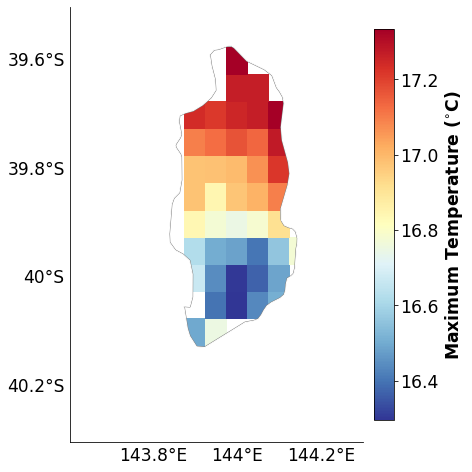

In [22]:
#Packages required for the mapping functions
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with cumulative rain during the year <--update central longitude in 'projection=ccrs.Mercator(' accordingly with the region of interest
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))
p=nc_t.maxt.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu_r, zorder=1, add_colorbar=False)

#Arranguing features, borders and axis labels 
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)

#you will need to update the 3 following lines accordingly with the region of interest
ax.set_extent([143.6, 144.3, -40.3, -39.5], crs=ccrs.PlateCarree())
gl.xlocator = mticker.FixedLocator([143.8, 144, 144.2])
gl.ylocator = mticker.FixedLocator([-39.6, -39.8, -40, -40.2])
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}
ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Setting colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Maximum Temperature ($^{\circ}$C)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

#Save the map to the current directory
#plt.savefig(os.getcwd(), dpi=600, bbox_inches='tight', pad_inches=0)